# Anomaly Detection System

We aim to build an anomaly detection system that relies on the Isolation Forest Algorithm to work on the dataset to mark the anomalous data points. 
<br> 
The entire process follows an unsupervised learning approach with clever feature engineering to generate a more sophisticated system

### Basic Files Upload

We upload the basic files and process the CSV data into a Pandas DataFrame. <br>
The entire process was done on the Google Colab platform, thus we used:

```Python
from google.colab import files
data = files.upload()
```

to upload it to the Online Jupyter Notebook




In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
data = files.upload()

Saving hackathon.csv to hackathon (2).csv


In [0]:
import io

In [0]:
df = pd.read_csv(io.StringIO(data['hackathon.csv'].decode('utf-8')))

### Investigating the Data Provided

We begin with elementary data investigation to check the various data points and their data types. 

In [5]:
df

,hour,date,users,event_count,event_name,day
0,0,2019-01-02,1,1,bBCA,0
1,0,2019-01-02,1,1,aO,0
2,0,2019-01-02,1,1,bBCD,0
3,0,2019-01-02,1,6,sD,0
4,0,2019-01-02,1,1,nO,14
5,0,2019-01-02,1,1,bST,0
6,0,2019-01-02,1,1,fL,0
7,0,2019-01-02,1,1,aO,14
8,0,2019-01-02,1,5,aS,0
9,1,2019-01-02,1,1,aO,7


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161209 entries, 0 to 161208
Data columns (total 6 columns):
hour           161209 non-null int64
date           161209 non-null object
users          161209 non-null int64
event_count    161209 non-null int64
event_name     161209 non-null object
day            161209 non-null int64
dtypes: int64(4), object(2)
memory usage: 7.4+ MB
None


In [0]:
df['date'] = pd.to_datetime(df['date'])

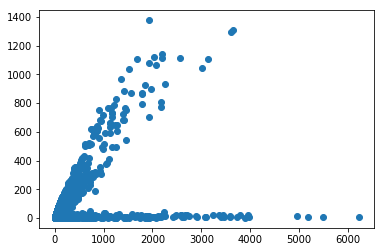

In [8]:
plt.scatter(df['event_count'], df['users'])

The above graph gives us a basic insight on to the nature of the outliers in the datapoints. The spread of the points along the *Y = X* and *X axis* indicate that anomalous data may lie on along those points.

### Feature Engineering

In this section, we try to create new distinguishable features from the given ones to provide the system with more valuable and usable datapoints to work on. 
<br>
For example: Here we have mapped each of the *event_names* to a particular number from **0** to **9**.

In [9]:
print(df.event_name.unique())

['bBCA' 'aO' 'bBCD' 'sD' 'nO' 'bST' 'fL' 'aS' 'cFE' 'nR']


In [0]:
a = df.event_name.unique()

In [0]:
enum_event_name = {}
for i in range(len(a)):
  enum_event_name[a[i]] = i

In [12]:
print(enum_event_name)

{'bBCA': 0, 'aO': 1, 'bBCD': 2, 'sD': 3, 'nO': 4, 'bST': 5, 'fL': 6, 'aS': 7, 'cFE': 8, 'nR': 9}


In [0]:
df['event_index'] = df['event_name'].map(enum_event_name)

Here we extract the features provided by the date column of the dataset.

In [0]:
df['day_of_month'] = df['date'].dt.day

In [0]:
df['month'] = df['date'].dt.month

Day of the Week : *0* for *Monday* --> *6* for *Sunday*.

In [0]:
df['day_of_week'] = df['date'].dt.dayofweek 

In [17]:
df #Final Feature Set of the Data

,hour,date,users,event_count,event_name,day,event_index,day_of_month,month,day_of_week
0,0,2019-01-02,1,1,bBCA,0,0,2,1,2
1,0,2019-01-02,1,1,aO,0,1,2,1,2
2,0,2019-01-02,1,1,bBCD,0,2,2,1,2
3,0,2019-01-02,1,6,sD,0,3,2,1,2
4,0,2019-01-02,1,1,nO,14,4,2,1,2
5,0,2019-01-02,1,1,bST,0,5,2,1,2
6,0,2019-01-02,1,1,fL,0,6,2,1,2
7,0,2019-01-02,1,1,aO,14,1,2,1,2
8,0,2019-01-02,1,5,aS,0,7,2,1,2
9,1,2019-01-02,1,1,aO,7,1,2,1,2


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161209 entries, 0 to 161208
Data columns (total 10 columns):
hour            161209 non-null int64
date            161209 non-null datetime64[ns]
users           161209 non-null int64
event_count     161209 non-null int64
event_name      161209 non-null object
day             161209 non-null int64
event_index     161209 non-null int64
day_of_month    161209 non-null int64
month           161209 non-null int64
day_of_week     161209 non-null int64
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 12.3+ MB
None


In [0]:
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

In [0]:
features = df[['hour', 'users', 'event_count', 'event_index', 'day', 'day_of_month', 'day_of_week', 'month']]

### Principle Component Analysis (Dimensionality Reduction) for 2 components

We apply Principle Component Analysis to reduce the data points from 8 components to 2 components. This is not only useful for training the system but also helps in visualizing the outcomes.

In [21]:
pca = PCA(n_components = 2)
pca_features = pca.fit_transform(features)
print(pca_features[:,0])
print(pca_features[:,1])

[-19.33216276 -19.32604561 -19.31992847 ... -19.7492708  -19.76762224
 -18.94947076]
[-12.5068623  -12.5031032  -12.4993441  ...   0.41395476   0.40267747
   6.97134647]


In [0]:
df['pca_feature_1'] = pca_features[:,0]
df['pca_feature_2'] = pca_features[:,1]

features_w_pca = df[['hour', 'users', 'event_count', 'event_index', 'day', 'day_of_month', 'day_of_week', 'month', 'pca_feature_1', 'pca_feature_2']]

In [0]:
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(features_w_pca)
features_w_pca = pd.DataFrame(np_scaled)

In [0]:
outliers_fraction = 0.01 #Estimation of the fraction of the outliers

In [25]:
model = IsolationForest(contamination = outliers_fraction)
model.fit(features_w_pca)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [26]:
features_w_pca['anomaly'] = pd.Series(model.predict(features_w_pca))
features_w_pca['anomaly'] = features_w_pca['anomaly'].map({1:0, -1:1})

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [27]:
print(features_w_pca['anomaly'].value_counts()) # Output 1

0    159596
1      1613
Name: anomaly, dtype: int64


In [28]:
features_w_pca

,0,1,2,3,4,5,6,7,8,9,anomaly
0,-1.685574,-0.321686,-0.242535,-1.447679,-0.680779,-1.600591,-0.503203,-1.701875,-0.248640,-0.571846,0
1,-1.685574,-0.321686,-0.242535,-1.113669,-0.680779,-1.600591,-0.503203,-1.701875,-0.248562,-0.571674,0
2,-1.685574,-0.321686,-0.242535,-0.779658,-0.680779,-1.600591,-0.503203,-1.701875,-0.248483,-0.571502,0
3,-1.685574,-0.321686,-0.176886,-0.445647,-0.680779,-1.600591,-0.503203,-1.701875,-0.185511,-0.546384,0
4,-1.685574,-0.321686,-0.242535,-0.111637,-0.035930,-1.600591,-0.503203,-1.701875,-0.253854,0.016442,0
5,-1.685574,-0.321686,-0.242535,0.222374,-0.680779,-1.600591,-0.503203,-1.701875,-0.248247,-0.570987,0
6,-1.685574,-0.321686,-0.242535,0.556385,-0.680779,-1.600591,-0.503203,-1.701875,-0.248168,-0.570815,0
7,-1.685574,-0.321686,-0.242535,-1.113669,-0.035930,-1.600591,-0.503203,-1.701875,-0.254090,0.015926,0
8,-1.685574,-0.321686,-0.190016,0.890395,-0.680779,-1.600591,-0.503203,-1.701875,-0.197775,-0.550685,0
9,-1.524884,-0.321686,-0.242535,-1.113669,-0.358354,-1.600591,-0.503203,-1.701875,-0.251353,-0.278238,0


In [0]:
a = features_w_pca.loc[features_w_pca['anomaly'] == 1, [8,9]] 

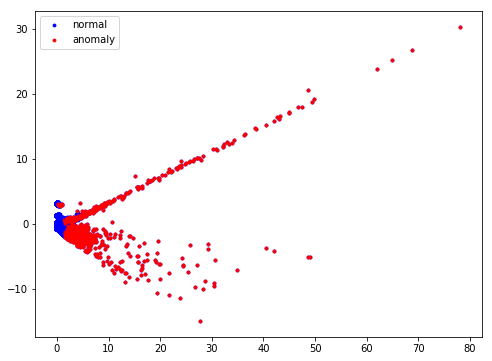

In [30]:
plt.figure(figsize=(8,6))
plt.scatter(features_w_pca[8],features_w_pca[9], color='blue', s = 8,label='normal')
plt.scatter(a[8],a[9],color='red', s = 8,label='anomaly')
plt.legend()

### Principle Component Analysis for 3 components

Here we do the same thing as in the previous section; however, we increase the PCA components to 3 which would provide more sophistication to the system thus allowing it to make more complex relatins. <br> 
At the same time, making the final components to 3 allows us to still visualize the data.

In [0]:
pca_3 = PCA(n_components = 3)
pca_3_features = pca_3.fit_transform(features)

In [0]:
df['pca_feature_1'] = pca_3_features[:,0]
df['pca_feature_2'] = pca_3_features[:,1]
df['pca_feature_3'] = pca_3_features[:,2]

features_w_pca_3 = df[['hour', 'users', 'event_count', 'event_index', 'day', 'day_of_month', 'day_of_week', 'month', 'pca_feature_1', 'pca_feature_2', 'pca_feature_3']]

In [0]:
np_scaled_3 = min_max_scaler.fit_transform(features_w_pca_3)
features_w_pca_3 = pd.DataFrame(np_scaled_3)

In [34]:
model_3 = IsolationForest(contamination = outliers_fraction)
model_3.fit(features_w_pca_3)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [35]:
features_w_pca_3['anomaly'] = pd.Series(model_3.predict(features_w_pca_3))
features_w_pca_3['anomaly'] = features_w_pca_3['anomaly'].map({1:0, -1:1})

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [36]:
print(features_w_pca_3['anomaly'].value_counts()) #Output 2

0    159596
1      1613
Name: anomaly, dtype: int64


In [37]:
features_w_pca_3

,0,1,2,3,4,5,6,7,8,9,10,anomaly
0,-1.685574,-0.321686,-0.242535,-1.447679,-0.680779,-1.600591,-0.503203,-1.701875,-0.248640,-0.571846,0.512446,0
1,-1.685574,-0.321686,-0.242535,-1.113669,-0.680779,-1.600591,-0.503203,-1.701875,-0.248562,-0.571674,0.511197,0
2,-1.685574,-0.321686,-0.242535,-0.779658,-0.680779,-1.600591,-0.503203,-1.701875,-0.248483,-0.571502,0.509947,0
3,-1.685574,-0.321686,-0.176886,-0.445647,-0.680779,-1.600591,-0.503203,-1.701875,-0.185511,-0.546384,0.553049,0
4,-1.685574,-0.321686,-0.242535,-0.111637,-0.035930,-1.600591,-0.503203,-1.701875,-0.253854,0.016442,0.231650,0
5,-1.685574,-0.321686,-0.242535,0.222374,-0.680779,-1.600591,-0.503203,-1.701875,-0.248247,-0.570987,0.506199,0
6,-1.685574,-0.321686,-0.242535,0.556385,-0.680779,-1.600591,-0.503203,-1.701875,-0.248168,-0.570815,0.504949,0
7,-1.685574,-0.321686,-0.242535,-1.113669,-0.035930,-1.600591,-0.503203,-1.701875,-0.254090,0.015926,0.235398,0
8,-1.685574,-0.321686,-0.190016,0.890395,-0.680779,-1.600591,-0.503203,-1.701875,-0.197775,-0.550685,0.539181,0
9,-1.524884,-0.321686,-0.242535,-1.113669,-0.358354,-1.600591,-0.503203,-1.701875,-0.251353,-0.278238,0.373800,0


In [0]:
a = features_w_pca_3.loc[features_w_pca_3['anomaly'] == 1, [8,9,10]] 

In [0]:
from mpl_toolkits.mplot3d import Axes3D

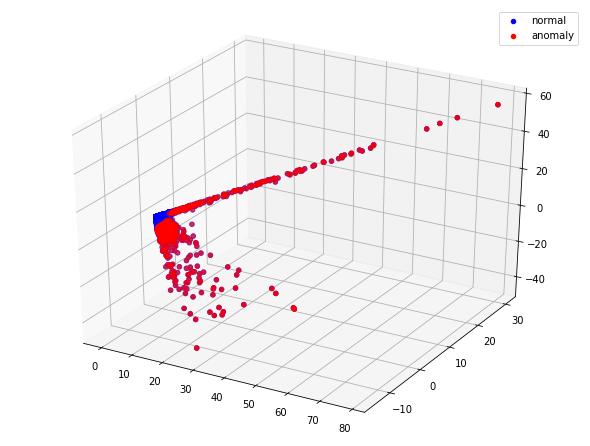

In [40]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
ax.scatter(features_w_pca_3[8],features_w_pca_3[9], features_w_pca_3[10], color='blue', label='normal')
ax.scatter(a[8],a[9],a[10],color='red',label='anomaly')
ax.legend()
plt.show()

### PCA without normalizing

We realize that some datatypes may not be normalizable, thus we allow the system to train on the discrete values rather than the normalized real values.

In [0]:
pca_3 = PCA(n_components = 3)
pca_3_features = pca_3.fit_transform(features)

In [0]:
df['pca_feature_1'] = pca_3_features[:,0]
df['pca_feature_2'] = pca_3_features[:,1]
df['pca_feature_3'] = pca_3_features[:,2]

features_w_pca_3_nnorm = df[['hour', 'users', 'event_count', 'event_index', 'day', 'day_of_month', 'day_of_week', 'month', 'pca_feature_1', 'pca_feature_2', 'pca_feature_3']]

In [43]:
model_3_nnorm = IsolationForest(contamination = outliers_fraction)
model_3_nnorm.fit(features_w_pca_3_nnorm)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [44]:
features_w_pca_3_nnorm['anomaly'] = pd.Series(model_3_nnorm.predict(features_w_pca_3_nnorm))
features_w_pca_3_nnorm['anomaly'] = features_w_pca_3_nnorm['anomaly'].map({1:0, -1:1})

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [45]:
print(features_w_pca_3_nnorm['anomaly'].value_counts()) #Output 3

0    159596
1      1613
Name: anomaly, dtype: int64


In [46]:
features_w_pca_3_nnorm

,hour,users,event_count,event_index,day,day_of_month,day_of_week,month,pca_feature_1,pca_feature_2,pca_feature_3,anomaly
0,0,1,1,0,0,2,2,1,-19.332163,-12.506862,10.267715,0
1,0,1,1,1,0,2,2,1,-19.326046,-12.503103,10.242679,0
2,0,1,1,2,0,2,2,1,-19.319928,-12.499344,10.217644,0
3,0,1,6,3,0,2,2,1,-14.423780,-11.949968,11.081250,0
4,0,1,1,4,14,2,2,1,-19.737512,0.359602,4.641487,0
5,0,1,1,5,0,2,2,1,-19.301577,-12.488067,10.142537,0
6,0,1,1,6,0,2,2,1,-19.295460,-12.484308,10.117501,0
7,0,1,1,1,14,2,2,1,-19.755864,0.348324,4.716594,0
8,0,1,5,7,0,2,2,1,-15.377318,-12.044055,10.803379,0
9,1,1,1,1,7,2,2,1,-19.543069,-6.085351,7.489713,0


In [0]:
a = features_w_pca_3_nnorm.loc[features_w_pca_3_nnorm['anomaly'] == 1, ['pca_feature_1','pca_feature_2','pca_feature_3']] 

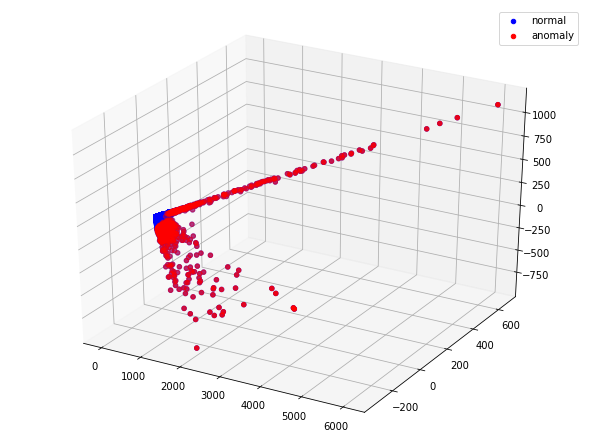

In [48]:
fig = plt.figure(figsize=(8,6))
ax = Axes3D(fig)
ax.scatter(features_w_pca_3_nnorm['pca_feature_1'],features_w_pca_3_nnorm['pca_feature_2'], features_w_pca_3_nnorm['pca_feature_3'], color='blue', label='normal')
ax.scatter(a['pca_feature_1'],a['pca_feature_2'],a['pca_feature_3'],color='red', label='anomaly')
ax.legend()
plt.show()

### K-Means Clustering
We apply K means to cluster the anomalies. We detect the anomalies first then we attempt to use **KMeans Algorithm** to cluster anomalies with similar causes. 

In [0]:
from sklearn.cluster import KMeans

In [50]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit_transform(a)


array([[ 134.04096111,  756.87716047, 3604.37684901, 1837.4324616 ],
       [ 182.09637119,  668.56357795, 3506.43401282, 1740.71026207],
       [ 463.0023877 ,  375.99895616, 3177.50574133, 1410.4891043 ],
       ...,
       [  76.54851089,  792.17758099, 3692.71168867, 1907.81396063],
       [ 127.91138235,  868.42393039, 3757.43697985, 1977.44775559],
       [ 120.89616218,  832.93917838, 3697.0431834 , 1925.72384671]])

In [51]:
kmeans.cluster_centers_

array([[ 266.62241283,  -27.20511812,  -62.82751357],
       [1006.61109242,  -24.59656092, -106.41794692],
       [3828.76862916,  344.2634391 ,  534.78702763],
       [2105.81849916,   95.43026134,   93.57376331]])

We used *4* means to cluster the anomalies to 4 different categories of anomalies. <br>
The number of the clusters may be increased as per the requirements.

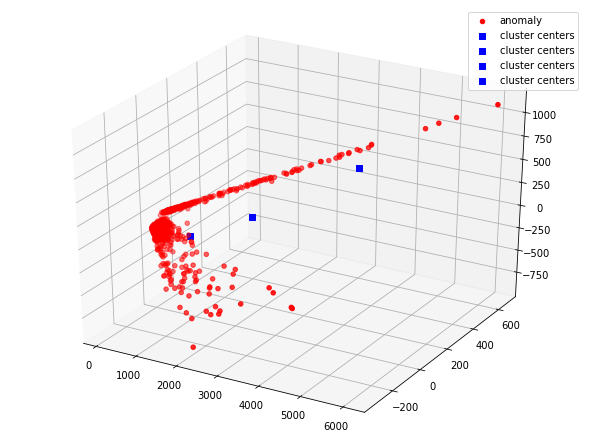

In [53]:
fig2 = plt.figure(figsize = (8,6))
ax = Axes3D(fig2)
ax.scatter(a['pca_feature_1'],a['pca_feature_2'],a['pca_feature_3'],color='red', label='anomaly')
for i in kmeans.cluster_centers_:
  ax.scatter(i[0],i[1],i[2], marker = 's', s = 30, color = 'blue', label='cluster centers')
ax.legend()

### Program to Send Email

The code for this section is in the PPT rather than here for the brevity of this file. <br>
We use *SMTP to send emails*. The email would be sent to the person in charge through the code given in the PPT **when an anomaly is detected** and *may* contain the following details:
1. K-Mean Clustering Group
2. Time Series KPI Data
3. Similar errors in the past

### Real Time Anomaly Checking

The code below demonstrates roughly the pipeline for the data to go through to give the result as anomalous or not. 

In [ ]:
a = input()
inp = pd.read_csv()
inp['date'] = inp.to_datetime(inp['date'])
inp['event_index'] = inp['event_name'].map(enum_event_name)
inp['day_of_month'] = inp['date'].dt.day
inp['month'] = inp['date'].dt.month
inp['day_of_week'] = inp['date'].dt.dayofweek

inp_features = inp[['hour', 'users', 'event_count', 'event_index', 'day', 'day_of_month', 'day_of_week', 'month']]

pca_3_inp_features = pca_3.fit_transform(inp_features)
inp['pca_feature_1'] = pca_3_inp_features[:,0]
inp['pca_feature_2'] = pca_3_inp_features[:,1]
inp['pca_feature_3'] = pca_3_inp_features[:,2]


output = model_3_nnorm.predict(inp)
if output == 1:
  pass
else:
  send_email(error_id_from_KMeans, some_error) # Send Email to the person-in-charge in case of anomaly

### Conclusion

In the 3 models created: 

*   **2 PCA components**: It gave **1613** anomalous data points.
*   **3 PCA components**: It gave also **1613** anomalous data points, which was expected and verified the construction of the system.
*   **3 PCA components without normalization**: Since some data points are not normalizable, not normalizing them makes more sense. But we observe that that makes *no difference* to the output of the system. We again get **1613** anomalous points.

Combining this with the initial insight from the graph we can say that the model has successfully pointed out the anomalous data points from the data set. 

Also we used:

```
outliers_fraction = 0.01
```
However, this may be changed through the use of a supervised learning algorithm on a small set of known data or using K-Means on a labelled set.

Using the **clustering algorithms** we were able to group the anomalies to *4* different types.

#### Idea Flow
1. We first investigated the data and analyze to develop basic insights of the data.
2. We then engineered features to make the system more sophisticated and provide it with more non-trivial data points. 
3. We then applied PCA (2 components and 3 components) to allow us to visualize the data and to provide for dimensionality reduction.
4. We applied the *Isolation Algorithm* on the data to then find out the anomalies present in the data.
5. After getting the anomalies, we used the *K-Means Clustering Algorithm* to cluster the similsr data and provide categories for the anomalous data.